# Task 4.10 Part 1.  

## Table of contents: 

### Q.1 Importing Data 

### Q.2 Addressing any PII data 

### Q.3  Creating a regional segmentation of the data

#### 3.2. Comparing spending habits accross regions 

### Q.4 Exclude low-activity customers from the data 

### Q.5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

## Importing Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
path = r'/Users/nurgul/Instacart Basket Analysis'

In [3]:
# Importing Data set customers.csv
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','ords_prods_customers_left.pkl'))  

In [4]:
# Cheking df 
df.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,...,mean_expenses,first name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,5.8,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,5.8,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,12,20.0,3160996,138,1,5,13,NaN,...,20.0,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,12,20.0,2254091,138,10,5,14,6.0,...,20.0,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,10,12.9,505689,138,9,6,12,7.0,...,12.9,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_name               object 
 2   department_id              int64  
 3   prices                     float32
 4   order_id                   int64  
 5   user_id                    int64  
 6   order_number               int64  
 7   orders_day_of_week         int64  
 8   hour_of_day_ordered        int64  
 9   days_since_prior_order     float64
 10  add_to_cart_order          int64  
 11  reordered                  int64  
 12  price_range_loc            object 
 13  busiest_dat                object 
 14  Busiest_day                object 
 15  busiest_day                object 
 16  busiest_peroid_of_the_day  object 
 17  max_order                  int64  
 18  loyalty_flag               object 
 19  mean_spend                 float64
 20  

In [6]:
df.shape

(32404859, 33)

## Q.2 Addressing any PII data

In [7]:
# Droping First and Last names columns
df=df.drop(columns= ['first name', 'surname'])

In [8]:
df.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,...,median_order_frequency,order_frequency_flag,mean_expenses,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,8.0,Frequent custome,5.8,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,8.0,Frequent custome,5.8,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,12,20.0,3160996,138,1,5,13,NaN,...,8.0,Frequent custome,20.0,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,12,20.0,2254091,138,10,5,14,6.0,...,8.0,Frequent custome,20.0,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,10,12.9,505689,138,9,6,12,7.0,...,8.0,Frequent custome,12.9,Male,Minnesota,81,8/1/2019,1,married,49620


In [9]:
df.shape

(32404859, 31)

## Q.3 Creating a regional segmentation of the data

In [10]:
df['state'].unique()

array(['Minnesota', 'Vermont', 'Wisconsin', 'Hawaii',
       'District of Columbia', 'Tennessee', 'Oregon', 'Alaska', 'Alabama',
       'Indiana', 'Florida', 'Kansas', 'North Carolina', 'Utah', 'Maine',
       'North Dakota', 'South Dakota', 'Delaware', 'Illinois', 'Wyoming',
       'Maryland', 'Louisiana', 'New Jersey', 'Georgia', 'Arkansas',
       'California', 'Idaho', 'New Hampshire', 'West Virginia', 'Nevada',
       'New Mexico', 'New York', 'Rhode Island', 'Nebraska',
       'Massachusetts', 'Texas', 'Pennsylvania', 'Iowa', 'Kentucky',
       'Michigan', 'Ohio', 'Oklahoma', 'Arizona', 'Washington',
       'Virginia', 'Connecticut', 'Mississippi', 'Colorado', 'Montana',
       'Missouri', 'South Carolina'], dtype=object)

In [11]:
# Using for loop to create regions 
result=[]
for value in df['state']:
    if value in ('Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
                 'New York', 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
                   'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
                  'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
                  'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append ('West')
    else:
        result.append('Unknown')   

In [12]:
# Checking result list
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Mi

In [13]:
#Creating new column to reflect the results 
df['Region']=result

In [14]:
df['Region'].value_counts(dropna=False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### 3.2. Comparing spending habits accross regions

In [15]:
# Creating pivot table 
df1 = df.pivot_table(index='Region', columns='spender_flag', values='order_number', aggfunc='count', fill_value=0)

In [16]:
df1.head()

spender_flag,High spender,Low spender
Region,,
Midwest,7441393,155932
Northeast,5614556,108180
South,10582404,209481
West,8132642,160271


In [17]:
# Grouping by 'Region' and 'Spender_Flag' and calculate the count of order numbers
grouped_df = df.groupby(['Region', 'spender_flag'])['order_number'].count().unstack()

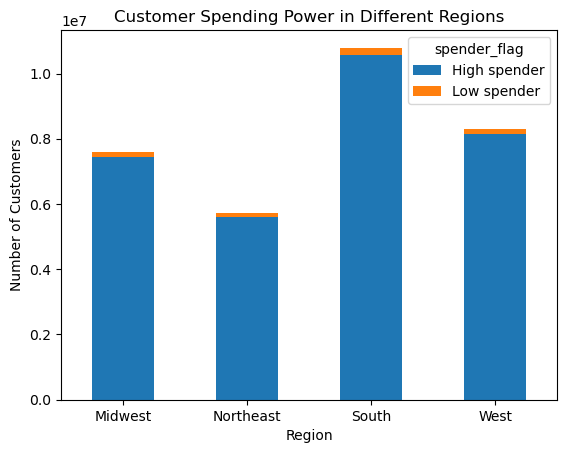

In [18]:
# Plot the bar chart
bar_spender_region=grouped_df.plot(kind='bar', stacked=True)
plt.title('Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Exporting bar chart 
bar_spender_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region_prop.png'))

### Q.4 Exclude low-activity customers from the data 

In [20]:
# Creating exclusion flag
df['exclusion_flag'] = np.where(df['max_order'] < 5, 'Yes', 'No')

In [21]:
# Checking new column
df.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,...,mean_expenses,gender,state,age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,5.8,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,5.8,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
2,907,Premium Sliced Bacon,12,20.0,3160996,138,1,5,13,NaN,...,20.0,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
3,907,Premium Sliced Bacon,12,20.0,2254091,138,10,5,14,6.0,...,20.0,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
4,1000,Apricots,10,12.9,505689,138,9,6,12,7.0,...,12.9,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No


In [22]:
# Creating a new data frame for all the customers who have ordered fewer than 5 times.
df2 = df[df['exclusion_flag'] == 'Yes']

In [23]:
# Checking new data frame
df2.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,...,mean_expenses,gender,state,age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag
340,1,Chocolate Sandwich Cookies,19,5.8,652770,764,1,3,13,NaN,...,5.8,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
341,1,Chocolate Sandwich Cookies,19,5.8,1813452,764,3,4,17,9.0,...,5.8,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
342,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,19,1.7,652770,764,1,3,13,NaN,...,1.7,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
343,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,19,1.7,705212,764,2,2,10,13.0,...,1.7,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
344,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,19,1.7,1813452,764,3,4,17,9.0,...,1.7,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes


In [24]:
df2.shape

(1440295, 33)

In [25]:
# Exporting df5 with the "under 5 orders" records
df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'under_five_orders.csv'))

In [26]:
# Removing the "under 5 orders" records from the main data frame.
df = df[df['exclusion_flag'] != 'Yes']

In [27]:
# Checking record removal
df.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,...,mean_expenses,gender,state,age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,5.8,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,5.8,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
2,907,Premium Sliced Bacon,12,20.0,3160996,138,1,5,13,NaN,...,20.0,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
3,907,Premium Sliced Bacon,12,20.0,2254091,138,10,5,14,6.0,...,20.0,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
4,1000,Apricots,10,12.9,505689,138,9,6,12,7.0,...,12.9,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No


In [28]:
df.shape

(30964564, 33)

### Q.5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

This section will address questions from the project brief: 

#### Q1. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)? 

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

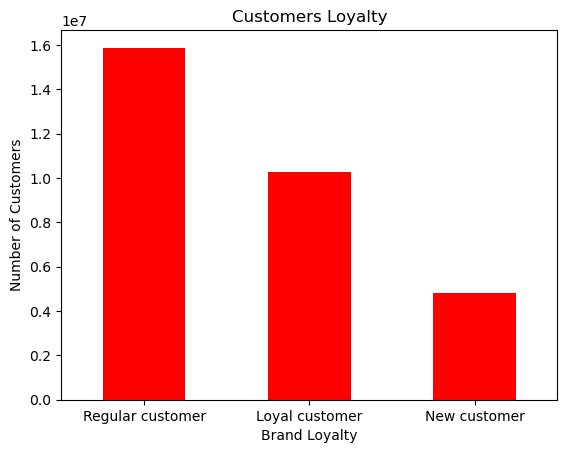

In [29]:
# Creating a bar chart showing the number of orders regarding their brand loyalty
bar_orders_loyalty = df['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Brand Loyalty', ylabel = 'Number of Customers', color = 'red')
plt.xticks(rotation=0)

In [30]:
# Exporting the bar chart 
bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

#### Q.2: Are there differences in ordering habits based on a customer’s loyalty status?

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

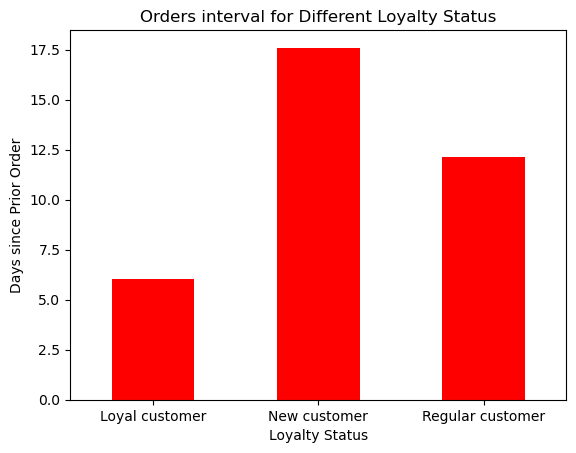

In [31]:
# Orders interval
bar_orders_interval_loyalty = df.groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(title = 'Orders interval for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Days since Prior Order', color = 'red')
plt.xticks(rotation=0)

In [32]:
# Exporting the chart
bar_orders_interval_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_interval_loyalty.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

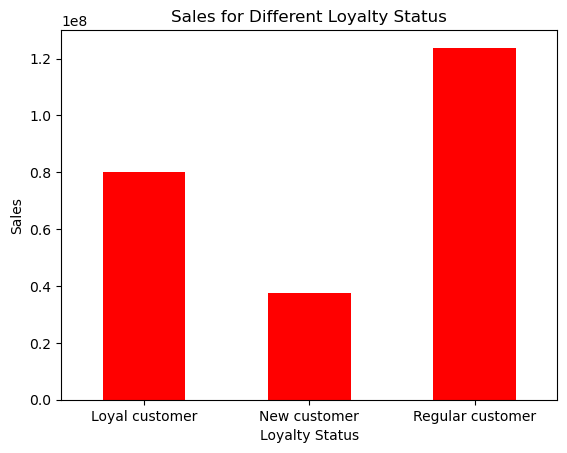

In [33]:
# Prices of orders
bar_prices_loyalty = df.groupby('loyalty_flag')['prices'].sum().plot.bar(title = 'Sales for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Sales', color = 'red')
plt.xticks(rotation=0)

In [34]:
# Exporting the chart
bar_prices_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_prices_loyalty.png'))

In [35]:
# Orders day of the week 
df.groupby('loyalty_flag')['orders_day_of_week'].value_counts()

loyalty_flag      orders_day_of_week
Loyal customer    1                     1843401
                  0                     1754731
                  5                     1456715
                  2                     1352343
                  6                     1318366
                  4                     1292042
                  3                     1266495
New customer      0                      984879
                  1                      818902
                  6                      690559
                  2                      625288
                  5                      587718
                  3                      560418
                  4                      535931
Regular customer  0                     3169000
                  1                     2749383
                  6                     2282379
                  2                     2047075
                  5                     1989296
                  3                     1842622
   

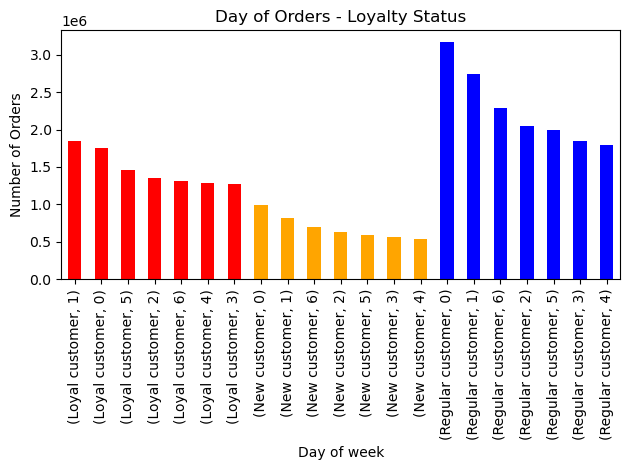

In [36]:
bar_dow_loyalty = df.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['red','red','red','red','red','red','red', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()

In [37]:
# Exporting the chart
bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_loyalty.png'))

In [38]:
# What time of the day had most orders
df_oh_loyalty = df.groupby('loyalty_flag')['hour_of_day_ordered'].value_counts()

In [39]:
# Check the top 3 ordering hours of New customer
df_oh_loyalty['New customer'].head(3)

hour_of_day_ordered
15    414283
14    409947
13    409847
Name: count, dtype: int64

In [40]:
# Check the top 3 ordering hours of Regular customer
df_oh_loyalty['Regular customer'].head(3)

hour_of_day_ordered
11    1339172
10    1329666
14    1322794
Name: count, dtype: int64

In [41]:
# Check the top 3 ordering hours of Loyal customer
df_oh_loyalty['Loyal customer'].head(3)

hour_of_day_ordered
10    937669
9     882740
11    873024
Name: count, dtype: int64

In [4]:
# Creating a column called 'result' to indicate department name
result = []

for value in df["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")
    elif value == 4:
        result.append("produce")
    elif value == 5:
        result.append("alchol")
    elif value == 6:
        result.append("international")
    elif value == 7:
        result.append("beverages")
    elif value == 8:
        result.append("pets")
    elif value == 9:
        result.append("dry goods pasta")
    elif value == 10:
        result.append("bulk")
    elif value == 11:
        result.append("personal care")
    elif value == 12:
        result.append("meat seafood")
    elif value == 13:
        result.append("pantry")
    elif value == 14:
        result.append("breakfast")
    elif value == 15:
        result.append("canned goods")
    elif value == 16:
        result.append("dairy eggs")
    elif value == 17:
        result.append("household")   
    elif value == 18:
        result.append("babies")
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    else:
        result.append("missing")

In [5]:
df['department_name'] = result

In [6]:
df['department_name'].value_counts(dropna = False)

department_name
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alchol              153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Orders by Department')

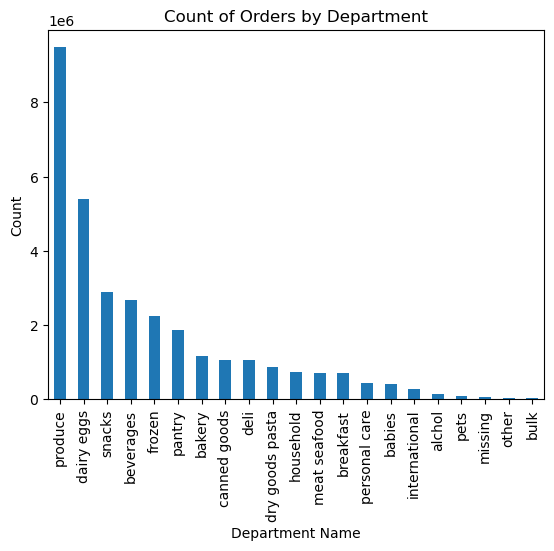

In [11]:
bar_dep_counts=df['department_name'].value_counts(dropna=False).plot.bar()
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.title('Count of Orders by Department')

In [12]:
# Exporting the chart
bar_dep_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_counts.png'))

In [45]:
df['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [46]:
# Creating a dataframe to group the data by 'department_name' and 'loyalty_flag'
df_grouped_dep_loyal = df.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [47]:
df_grouped_dep_loyal.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alchol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094


In [48]:
df_grouped_dep_loyal_sort = df_grouped_dep_loyal.sort_values(by = 'Regular customer', ascending = False)

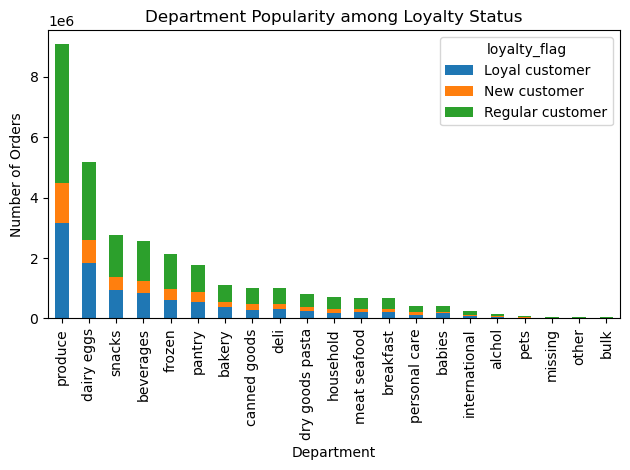

In [49]:
# Plot the data using a bar chart
bar_dep_loyalty = df_grouped_dep_loyal_sort.plot(kind = 'bar', stacked = True)
plt.title('Department Popularity among Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [50]:
# Exporting the chart 
bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'))

In [51]:
df_oh_dep_loyalty = df.groupby('loyalty_flag')['department_name'].value_counts()

In [52]:
# Check top 3 sold departments of each loyalty status
df_oh_dep_loyalty['New customer'].head(3)

department_name
produce       1336604
dairy eggs     750056
snacks         413107
Name: count, dtype: int64

In [53]:
df_oh_dep_loyalty['Regular customer'].head(3)

department_name
produce       4595293
dairy eggs    2596419
snacks        1410149
Name: count, dtype: int64

In [54]:
df_oh_dep_loyalty['Loyal customer'].head(3)

department_name
produce       3147376
dairy eggs    1830707
snacks         943150
Name: count, dtype: int64

#### Q. 3. Are there differences in ordering habits based on a customer’s region?

In [55]:
# Oders interval
df.groupby('Region')['days_since_prior_order'].mean()

Region
Midwest      10.892736
Northeast    10.774220
South        10.814227
West         10.754622
Name: days_since_prior_order, dtype: float64

In [56]:
# Prices 
df.groupby('Region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
Region                        
Midwest    7.792318  1.0  25.0
Northeast  7.781441  1.0  25.0
South      7.794439  1.0  25.0
West       7.790308  1.0  25.0

In [57]:
# Which days of week had most orders
df.groupby('Region')['orders_day_of_week'].value_counts()

Region     orders_day_of_week
Midwest    0                     1390189
           1                     1263655
           6                     1010086
           2                      947370
           5                      943396
           3                      855316
           4                      851501
Northeast  0                     1043698
           1                      954332
           6                      750282
           5                      716128
           2                      713159
           3                      649305
           4                      637781
South      0                     1955352
           1                     1808348
           6                     1429704
           5                     1342849
           2                     1340387
           3                     1229002
           4                     1205497
West       0                     1519371
           1                     1385351
           6               

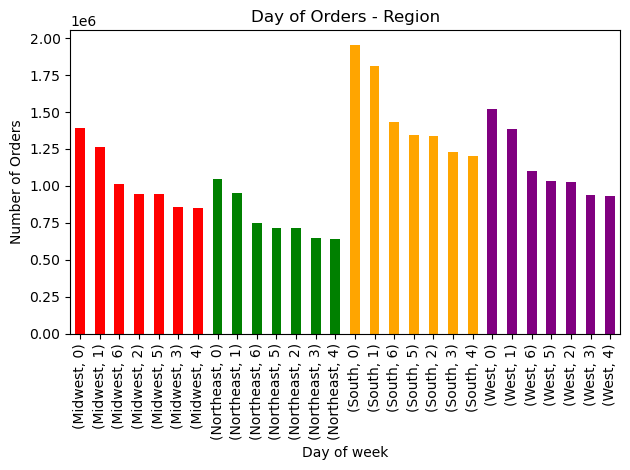

In [58]:
bar_dow_region = df.groupby('Region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Region', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['red','red','red','red','red','red','red', 'green','green','green','green','green','green','green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.tight_layout()

In [59]:
# Exporting the chart 
bar_dow_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_region.png'))

In [60]:
# What time of the day had most orders
df_oh_region=df.groupby('Region')['hour_of_day_ordered'].value_counts()

In [61]:
# Checking the top 3 ordering hours of Midwest
df_oh_region['Midwest'].head(3)

hour_of_day_ordered
10    621555
11    614330
15    598686
Name: count, dtype: int64

In [62]:
# Checking the top 3 ordering hours of Northeast
df_oh_region['Northeast'].head(3)

hour_of_day_ordered
10    464454
11    461204
14    454392
Name: count, dtype: int64

In [63]:
# Checking the top 3 ordering hours of South
df_oh_region['South'].head(3)

hour_of_day_ordered
10    885590
11    867995
14    851916
Name: count, dtype: int64

In [64]:
# Checking the top 3 ordering hours of West
df_oh_region['West'].head(3)

hour_of_day_ordered
10    678145
11    671351
14    665153
Name: count, dtype: int64

In [65]:
# Creating a dataframe to group the data by 'department_name' and 'Region'
df_grouped_dep_region = df.groupby(['department_name', 'Region']).size().unstack()

In [66]:
df_grouped_dep_region.head(22)

Region,Midwest,Northeast,South,West
department_name,,,,
alchol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [67]:
df_grouped_dep_region_sort = df_grouped_dep_region.sort_values(by = 'South', ascending = False)

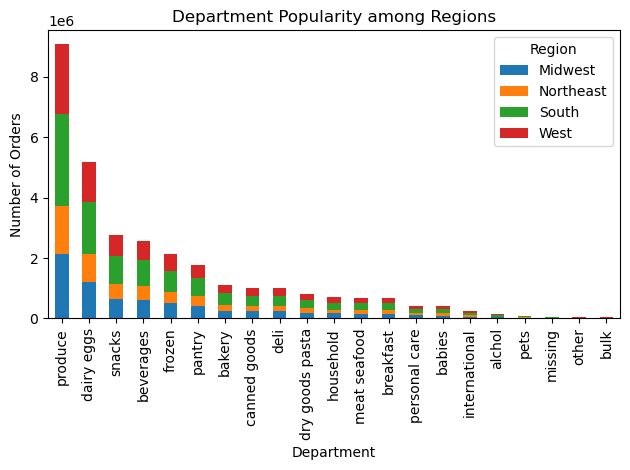

In [68]:
# Plot the data using a bar chart
bar_dep_region = df_grouped_dep_region_sort.plot(kind = 'bar', stacked = True)
plt.title('Department Popularity among Regions')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [69]:
# Exporting the chart 
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_region.png'))

In [70]:
# Checking top 3 sold departments of each region
df_grouped_dep_region['Midwest'].head(3)

department_name
alchol     34043
babies     95741
bakery    261753
Name: Midwest, dtype: int64

In [71]:
df_grouped_dep_region['Northeast'].head(3)

department_name
alchol     25017
babies     72712
bakery    199300
Name: Northeast, dtype: int64

In [72]:
df_grouped_dep_region['South'].head(3)

department_name
alchol     48813
babies    139511
bakery    371620
Name: South, dtype: int64

In [73]:
df_grouped_dep_region['West'].head(3)

department_name
alchol     36754
babies    102428
bakery    288155
Name: West, dtype: int64

#### Q. 4 Is there a connection between age and family status in terms of ordering habits? 

In [74]:
# Splitting data into groups based on age and family status
df.groupby('fam_status').agg ({'age': ['mean', 'min', 'max']})

age        
                                       mean min max
fam_status                                         
divorced/widowed                  70.510585  60  81
living with parents and siblings  19.502090  18  21
married                           51.495620  22  81
single                            38.600037  18  59

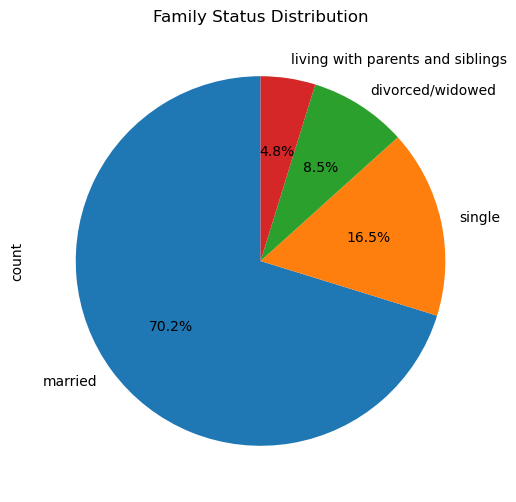

In [75]:
# Plot the pie chart for family status
plt.figure(figsize=(6, 6))
pie_fam_stat=df['fam_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Family Status Distribution')
# Show the plot
plt.show()

In [76]:
#Exporting pie chart 
pie_fam_stat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_stat.png'))

In [77]:
# Dividing customeres into 3 age groups 
df.loc[(df['age'] > 18) & (df['age'] >= 39),'age_flag']='Young Adult'
df.loc[(df['age'] < 39) & (df['age'] <= 59),'age_flag']='Middle aged Adult'
df.loc[df['age'] >= 60, 'age_flag']= 'Old Adult'

/var/folders/b1/dcgm49cs1dx0p3lkf95fklvr0000gp/T/ipykernel_94039/2456502173.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young Adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['age'] > 18) & (df['age'] >= 39),'age_flag']='Young Adult'


In [78]:
df.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,...,state,age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag,department_name,age_flag
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,No,snacks,Old Adult
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,No,snacks,Old Adult
2,907,Premium Sliced Bacon,12,20.0,3160996,138,1,5,13,NaN,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,No,meat seafood,Old Adult
3,907,Premium Sliced Bacon,12,20.0,2254091,138,10,5,14,6.0,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,No,meat seafood,Old Adult
4,1000,Apricots,10,12.9,505689,138,9,6,12,7.0,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,No,bulk,Old Adult


The rest of the notebook is in part 1.1 

In [79]:
# Export data to pkl
df.to_pickle(os.path.join(path,'02 Data/Prepared Data/ords_prods_customers_latest.pkl'))